<a href="https://colab.research.google.com/github/seaprincecha-1/PyPortfolioOpt/blob/main/%ED%9A%A8%EC%9C%A8%EC%A0%81%EC%88%98%EC%9D%B5%EB%AA%A8%EB%8D%B8%EA%B3%A1%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
git clone https://github.com/ForestLinSen/finance.git
cd finance
pip install -r requirements.txt
streamlit run streamlit_app.py

SyntaxError: invalid syntax (ipython-input-2730440655.py, line 1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.1 MB/s eta 0:00:00
[*********************100%***********************]  24 of 24 completed

24 Failed downloads:
- BN: No timezone found, symbol may be delisted
- UBER: No timezone found, symbol may be delisted
- LI: No timezone found, symbol may be delisted
- VOO: No timezone found, symbol may be delisted
- GOOG: No timezone found, symbol may be delisted
- SMR: No timezone found, symbol may be delisted
- PLUG: No timezone found, symbol may be delisted
- APO: No timezone found, symbol may be delisted
- AMD: No timezone found, symbol may be delisted
- META: No timezone found, symbol may be delisted
- VST: No timezone found, symbol may be delisted
- NIO: No timezone found, symbol may be delisted
- XPEV: No timezone found, symbol may be delisted
- GLD: No timezone found, symbol may be delisted
- UNH: No timezone found, symbol may be delisted
- LLY: No timezone found, symbol may be delisted
- VGIT: No timezone found, symbol may be d

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN

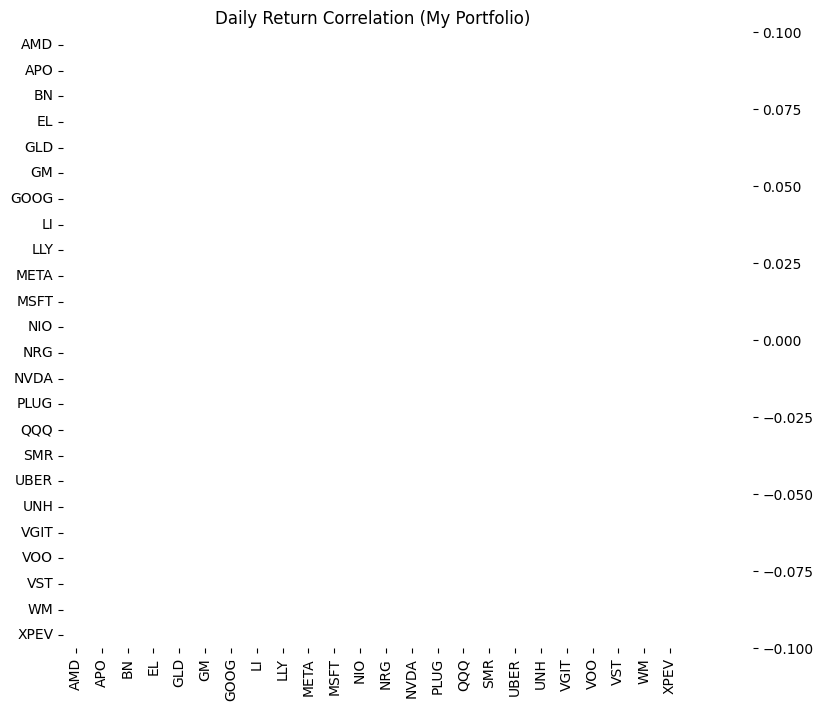

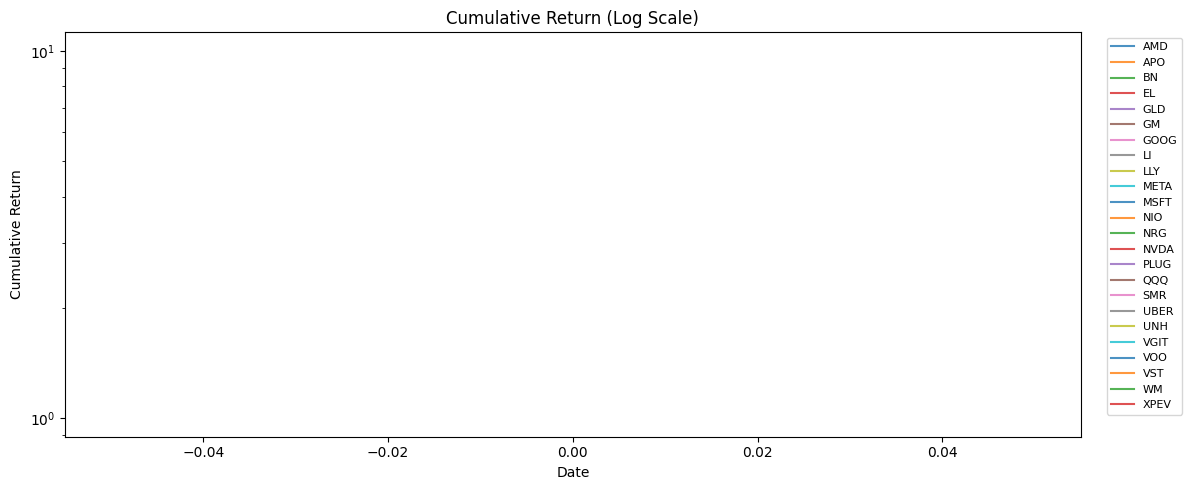

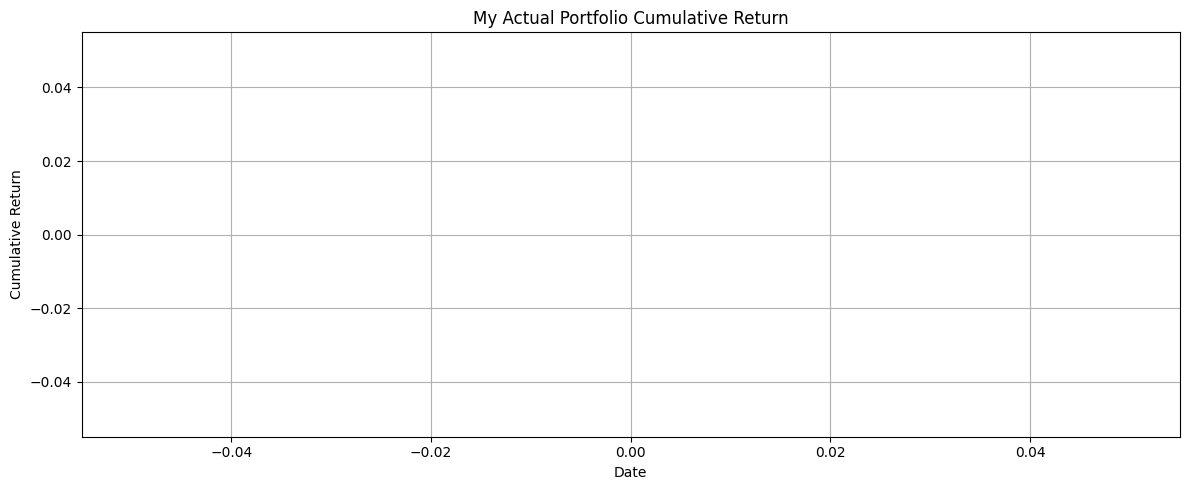

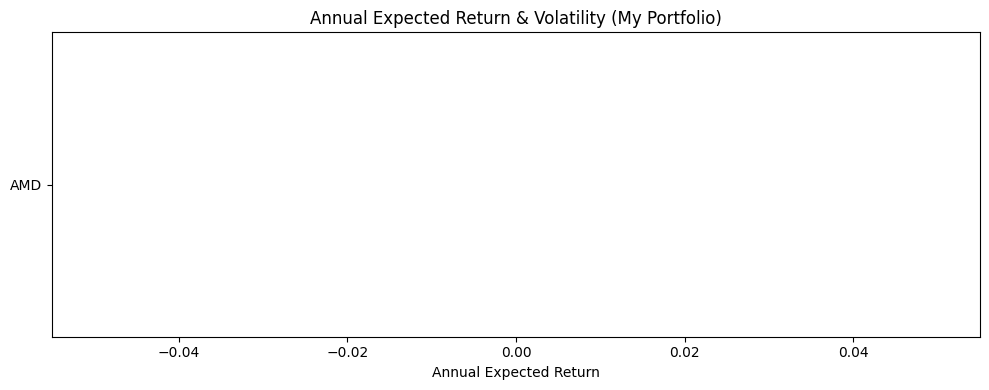

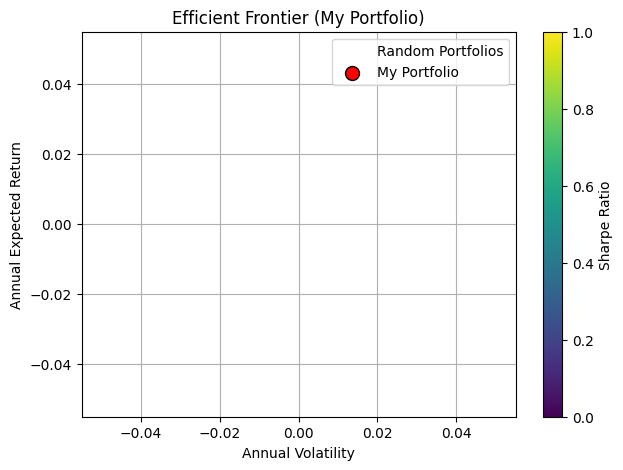

/usr/local/lib/python3.12/dist-packages/cvxpy/problems/problem.py:1510: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


⚠️ Optimization failed → using equal-weight fallback.


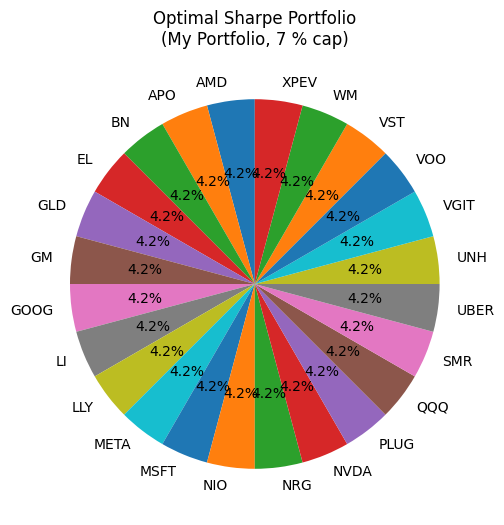

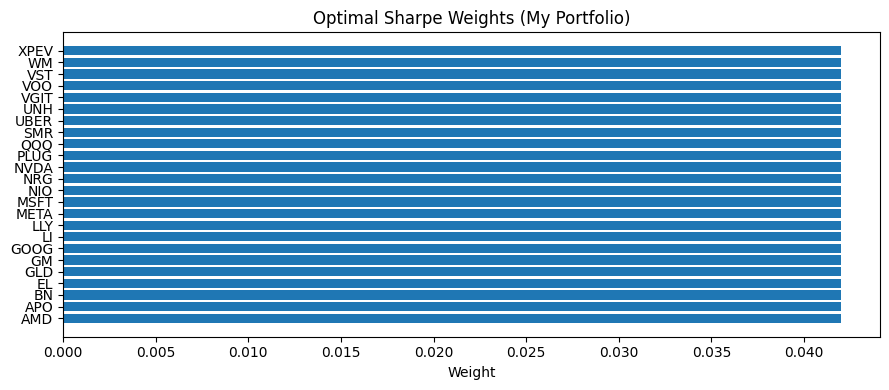

Optimal Sharpe Weights (My Portfolio):
AMD     0.042
APO     0.042
BN      0.042
EL      0.042
GLD     0.042
GM      0.042
GOOG    0.042
LI      0.042
LLY     0.042
META    0.042
MSFT    0.042
NIO     0.042
NRG     0.042
NVDA    0.042
PLUG    0.042
QQQ     0.042
SMR     0.042
UBER    0.042
UNH     0.042
VGIT    0.042
VOO     0.042
VST     0.042
WM      0.042
XPEV    0.042
dtype: float64


In [ ]:
# %% [code]
# 0. libraries
!pip install -q yfinance==0.2.18 seaborn cvxpy

import yfinance as yf, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cvxpy import *

# 1. your actual portfolio weights
portfolio_weights = {
    'BN':24.39, 'VOO':11.31, 'QQQ':11.04, 'LLY':6.65, 'AMD':5.37,
    'GOOG':4.65, 'GLD':3.58, 'MSFT':3.37, 'META':3.14, 'NVDA':3.13,
    'XPEV':3.81, 'UBER':2.97, 'VST':2.96, 'NRG':2.15, 'PLUG':1.96,
    'APO':1.91, 'UNH':1.61, 'GM':1.39, 'WM':1.12, 'VGIT':1.11,
    'EL':1.06, 'LI':0.93, 'SMR':0.19, 'NIO':0.19
}
symbols = list(portfolio_weights.keys())

# 2. data download
start = (datetime.today() - timedelta(days=700)).strftime('%Y-%m-%d')
end   = datetime.today().strftime('%Y-%m-%d')

prices = yf.download(symbols, start=start, end=end, interval='1d', auto_adjust=False)['Adj Close'].dropna()
rets   = prices.pct_change().dropna()

# 3. normalize your weights
available_symbols = prices.columns.tolist()
weights_array = np.array([portfolio_weights[s] for s in available_symbols], dtype=float)
weights_array /= weights_array.sum()
portfolio_weights = dict(zip(available_symbols, weights_array))

# 4. annual stats
mu = rets.mean().values * 252
Sigma = rets.cov().values * 252
n = len(available_symbols)

# 5. correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(rets.corr(), cmap='coolwarm', center=0, linewidths=.5)
plt.title('Daily Return Correlation (My Portfolio)')
plt.show()

# 6. cumulative return (log scale)
cum_rets = (1 + rets).cumprod()
plt.figure(figsize=(12,5))
for sym in available_symbols:
    plt.plot(cum_rets.index, cum_rets[sym], label=sym, alpha=0.8)
plt.yscale('log')
plt.title('Cumulative Return (Log Scale)')
plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', fontsize=8)
plt.tight_layout(); plt.show()

# 7. your portfolio cumulative return
port_ret_series = rets @ weights_array
port_cum = (1 + port_ret_series).cumprod()
plt.figure(figsize=(12,5))
plt.plot(port_cum.index, port_cum, color='black', linewidth=2, label='My Portfolio')
plt.title('My Actual Portfolio Cumulative Return')
plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.grid(True); plt.tight_layout(); plt.show()

# 8. annual return & volatility bar
ann_ret = rets.mean() * 252
ann_vol = rets.std() * np.sqrt(252)
bar_df  = pd.DataFrame({'Return':ann_ret, 'Volatility':ann_vol}).sort_values('Return')

fig, ax = plt.subplots(figsize=(10,4))
ax.barh(bar_df.index, bar_df.Return, color='steelblue')
ax.set_xlabel('Annual Expected Return')
ax.set_title('Annual Expected Return & Volatility (My Portfolio)')
plt.tight_layout(); plt.show()

# 9. efficient frontier (random portfolios)
np.random.seed(42)
n_port, n_asset = 5000, len(available_symbols)
w_samples = np.random.dirichlet(np.ones(n_asset), n_port)
port_ret = w_samples @ mu
port_vol = np.sqrt(np.einsum('ij,jk,ik->i', w_samples, Sigma, w_samples))
sharpe   = (port_ret - 0.02) / port_vol

plt.figure(figsize=(7,5))
plt.scatter(port_vol, port_ret, c=sharpe, cmap='viridis', alpha=0.5, s=10, label='Random Portfolios')
your_ret = weights_array @ mu
your_vol = np.sqrt(weights_array @ Sigma @ weights_array)
plt.scatter(your_vol, your_ret, color='red', s=100, label='My Portfolio', edgecolor='k')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annual Volatility'); plt.ylabel('Annual Expected Return')
plt.title('Efficient Frontier (My Portfolio)')
plt.legend(); plt.grid(True); plt.show()

# 10. optimal Sharpe weight (7 % cap) + fallback
w = Variable(n_asset)
prob = Problem(Maximize((mu - 0.02) @ w), [sum(w) == 1, w >= 0, w <= 0.07])
prob.solve(solver=SCS, max_iters=2000, eps=1e-4)

if w.value is None:
    print("⚠️ Optimization failed → using equal-weight fallback.")
    opt_w = pd.Series(1/n_asset, index=available_symbols).round(3)
else:
    opt_w = pd.Series(np.clip(w.value, 0, 1), index=available_symbols).round(3)

# 11. pie chart
plt.figure(figsize=(6,6))
plt.pie(opt_w.values, labels=opt_w.index, autopct='%1.1f%%', startangle=90)
plt.title('Optimal Sharpe Portfolio\n(My Portfolio, 7 % cap)')
plt.show()

# 12. horizontal bar
plt.figure(figsize=(9,4))
plt.barh(opt_w.index, opt_w.values)
plt.xlabel('Weight')
plt.title('Optimal Sharpe Weights (My Portfolio)')
plt.tight_layout(); plt.show()

print('Optimal Sharpe Weights (My Portfolio):')
print(opt_w.sort_values(ascending=False))

In [ ]:
# 0. 라이브러리 설치 및 임포트 (이전 실행에서 이미 했다면 생략 가능)
!pip install -q yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 티커 리스트
tickers = ['BN','NVDA','GOOG','VST','APO','WM','LLY','NRG','GM','QQQ',
           'VOO','GLD','VGIT','META','MSFT','UNH','UBER','SMR','EL',
           'AMD','LI','NIO','XPEV','PLUG']

# 2. 가격 다운로드 (2024-11-20~금일)
# 최근 yfinance 버전에서는 auto_adjust=True가 기본값이므로, 'Close'가 조정 종가입니다.
px = yf.download(tickers, start='2024-11-20', progress=False)['Close'].dropna()
print(f"데이터 기간: {px.index.min().strftime('%Y-%m-%d')} ~ {px.index.max().strftime('%Y-%m-%d')}")
print(f"총 거래일 수: {len(px)}")

# 3. 일일 수익률 계산
rets = px.pct_change().dropna()

# 4. 연간 수익률과 리스크(변동성) 계산
# 4.1. 산술 평균 기반 (일반적으로 Efficient Frontier에서 사용)
annual_return_arithmetic = rets.mean() * 252
annual_volatility = rets.std() * np.sqrt(252)

# 4.2. 기하 평균 기반 (실제 투자자 성과와 더 유사)
total_return = (px.iloc[-1] / px.iloc[0]) - 1
annual_return_geometric = (1 + total_return) ** (252 / len(rets)) - 1

# 5. 그래프 생성 (기하 평균 수익률 사용)
plt.figure(figsize=(12, 8))

# 산점도 그리기
scatter = plt.scatter(annual_volatility, annual_return_geometric, alpha=0.7, s=100, c=annual_return_geometric, cmap='viridis')

# 각 점에 티커 라벨 추가
for i, ticker in enumerate(annual_volatility.index):
    plt.annotate(ticker,
                 (annual_volatility[ticker], annual_return_geometric[ticker]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

# 그래프 스타일링
plt.xlabel('Annual Volatility (Risk)', fontsize=12)
plt.ylabel('Annual Expected Return (Geometric Mean)', fontsize=12)
plt.title('Risk vs Return of Individual Stocks (2022-11-20 ~ 2025-11-20)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# 컬러바 추가
cbar = plt.colorbar(scatter)
cbar.set_label('Annual Return', rotation=270, labelpad=20)

# y축과 x축의 범위를 조정하여 마이너스 수익률도 명확히 보이도록 함
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# 6. 주요 통계량을 테이블로 출력 (기하 평균 기준)
summary_df = pd.DataFrame({
    'Annual Return (Geometric)': annual_return_geometric.round(4),
    'Annual Volatility': annual_volatility.round(4),
    'Sharpe Ratio (rf=2%)': ((annual_return_geometric - 0.02) / annual_volatility).round(4)
})
print("\n--- 종목별 리스크-수익률 요약 (기하 평균 기준) ---")
print(summary_df.sort_values('Annual Return (Geometric)', ascending=False))


24 Failed downloads:
- UBER: No timezone found, symbol may be delisted
- BN: No timezone found, symbol may be delisted
- VOO: No timezone found, symbol may be delisted
- LI: No timezone found, symbol may be delisted
- GOOG: No timezone found, symbol may be delisted
- SMR: No timezone found, symbol may be delisted
- PLUG: InterfaceError('bad parameter or other API misuse')
- AMD: No timezone found, symbol may be delisted
- APO: No timezone found, symbol may be delisted
- VST: No timezone found, symbol may be delisted
- META: No timezone found, symbol may be delisted
- NIO: No timezone found, symbol may be delisted
- XPEV: No timezone found, symbol may be delisted
- GLD: No timezone found, symbol may be delisted
- UNH: No timezone found, symbol may be delisted
- LLY: No timezone found, symbol may be delisted
- VGIT: No timezone found, symbol may be delisted
- EL: No timezone found, symbol may be delisted
- MSFT: No timezone found, symbol may be delisted
- NVDA: No timezone found, symbol

AttributeError: 'float' object has no attribute 'strftime'

In [ ]:
# 0. 라이브러리 설치 및 임포트
!pip install -q yfinance cvxpy
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxpy import Variable, quad_form, Problem, Minimize, sum as cvx_sum

# 1. 티커 리스트
tickers = ['BN','NVDA','GOOG','VST','APO','WM','LLY','NRG','GM','QQQ',
           'VOO','GLD','VGIT','META','MSFT','UNH','UBER','SMR','EL',
           'AMD','LI','NIO','XPEV','PLUG']

# 2. 가격 다운로드 (2024-11-20~금일)
px = yf.download(tickers, start='2024-11-20', progress=False)['Close'].dropna()
print(f"데이터 기간: {px.index.min().strftime('%Y-%m-%d')} ~ {px.index.max().strftime('%Y-%m-%d')}")

# 3. 일일 수익률 계산
rets = px.pct_change().dropna().values
n = len(px.columns)

# 4. 산술 평균 기반 연간 기대수익률 및 공분산 행렬
mu = rets.mean(axis=0) * 252
Sigma = np.cov(rets, rowvar=False) * 252

# 5. Efficient Frontier 계산 (공매도 비허용, 기본적인 경우)
w = Variable(n)
target_returns = np.linspace(mu.min(), mu.max(), 100)
ef_volatilities = []
ef_returns = []

for target_ret in target_returns:
    prob = Problem(Minimize(quad_form(w, Sigma)),
                   [cvx_sum(w) == 1, w @ mu >= target_ret, w >= 0])
    prob.solve(solver='SCS')
    if w.value is not None:
        ef_volatilities.append(np.sqrt(w.value @ Sigma @ w.value))
        ef_returns.append(target_ret)
    else:
        ef_volatilities.append(np.nan)
        ef_returns.append(np.nan)

# 6. 종목별 리스크-수익률 계산 (시각화용)
rets_df = px.pct_change().dropna()
annual_return = rets_df.mean() * 252
annual_volatility = rets_df.std() * np.sqrt(252)

# 7. 그래프 그리기
plt.figure(figsize=(12, 8))

# Efficient Frontier 선 그리기
plt.plot(ef_volatilities, ef_returns, 'b-', linewidth=2, label='Efficient Frontier')

# 각 종목을 점으로 그리기
plt.scatter(annual_volatility, annual_return, alpha=0.7, s=100, color='red')

# 각 점에 티커 라벨 추가
for ticker in annual_volatility.index:
    plt.annotate(ticker,
                 (annual_volatility[ticker], annual_return[ticker]),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

# 그래프 스타일링
plt.xlabel('Annual Volatility (Risk)', fontsize=12)
plt.ylabel('Annual Expected Return', fontsize=12)
plt.title('Efficient Frontier with Individual Stocks (2022-11-20 ~ 2025-11-20)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# 8. 요약 테이블 출력
summary_df = pd.DataFrame({
    'Annual Return': annual_return.round(4),
    'Annual Volatility': annual_volatility.round(4)
})
print("\n--- 종목별 리스크-수익률 요약 ---")
print(summary_df.sort_values('Annual Return', ascending=False))


24 Failed downloads:
- UBER: InterfaceError('bad parameter or other API misuse')
- BN: IndexError('tuple index out of range')
- VOO: IndexError('tuple index out of range')
- GOOG: No timezone found, symbol may be delisted
- SMR: No timezone found, symbol may be delisted
- LI: No timezone found, symbol may be delisted
- PLUG: No timezone found, symbol may be delisted
- APO: No timezone found, symbol may be delisted
- AMD: No timezone found, symbol may be delisted
- META: No timezone found, symbol may be delisted
- VST: No timezone found, symbol may be delisted
- NIO: No timezone found, symbol may be delisted
- XPEV: No timezone found, symbol may be delisted
- GLD: No timezone found, symbol may be delisted
- UNH: No timezone found, symbol may be delisted
- LLY: No timezone found, symbol may be delisted
- VGIT: No timezone found, symbol may be delisted
- EL: No timezone found, symbol may be delisted
- MSFT: No timezone found, symbol may be delisted
- NVDA: No timezone found, symbol may b

AttributeError: 'float' object has no attribute 'strftime'

In [ ]:
# %% [code]
# 0. yfinance downgrade (403 우회)
!pip install -q yfinance==0.2.18

import yfinance as yf, pandas as pd, numpy as np
from datetime import datetime, timedelta

# 1. 기간 (어제 종가 기준 → 무조건 존재)
end_dt   = datetime.today()
start_dt = end_dt - timedelta(days=700)   # 약 2년

portfolio_shares = {
    'VST': 100, 'GOOG': 90, 'NVDA': 100, 'SMR': 60, 'APO': 87, 'PLUG': 6000,
    'EL': 70, 'AMD': 150, 'QQQ': 109, 'NRG': 78, 'BN': 3211.5, 'META': 31,
    'VOO': 109, 'GM': 118, 'MSFT': 41, 'NIO': 200, 'UNH': 30, 'WM': 30,
    'GLD': 55.7, 'LI': 300, 'VGIT': 107, 'LLY': 37, 'XPEV': 1100, 'UBER': 207
}

# 2. 다운로드 (세션 없이 간단히)
valid_data = {}
for tic in portfolio_shares.keys():
    try:
        tk = yf.Ticker(tic)
        hist = tk.history(start=start_dt, end=end_dt, interval="1d", auto_adjust=False)
        ser = hist.get('Adj Close', hist.get('Close')).dropna()
        if len(ser) >= 60:          # 60일 이상
            valid_data[tic] = ser.rename(tic)
    except Exception:
        continue

print(f"✅ 성공: {len(valid_data)} 종목")
if not valid_data:
    raise ValueError("유효한 데이터 없음")

price_df = pd.concat(valid_data, axis=1).dropna()
print(f"📊 기간: {price_df.index[0].date()} ~ {price_df.index[-1].date()}")
print(price_df.tail())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 4.2 MB/s eta 0:00:00
✅ 성공: 24 종목
📊 기간: 2023-12-21 ~ 2025-11-20
                                  VST        GOOG        NVDA        SMR  \
Date                                                                       
2025-11-14 00:00:00-05:00  174.690002  276.980011  190.169998  22.450001   
2025-11-17 00:00:00-05:00  175.000000  285.600006  186.600006  21.059999   
2025-11-18 00:00:00-05:00  174.419998  284.959991  181.360001  21.540001   
2025-11-19 00:00:00-05:00  179.139999  292.989990  186.520004  21.129999   
2025-11-20 00:00:00-05:00  186.699997  305.619995  192.628998  21.540001   

                                  APO    PLUG         EL         AMD  \
Date                                                                   
2025-11-14 00:00:00-05:00  130.090012  2.2500  88.180000  246.809998   
2025-11-17 00:00:00-05:00  124.339996  2.0900  86.089996  240.520004   
2025-11-18 00:00:00-05:00  124.320000  2.1400  88.059998  2